In [1]:
#libarary
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#import data

train = pd.read_csv('/Users/leozhang/Desktop/PythonClass/data/train.csv')
test = pd.read_csv('/Users/leozhang/Desktop/PythonClass/data/test.csv')


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
numerics = ['int64', 'float64']
train_numeric = train.select_dtypes(include=numerics)
test_numeric = test.select_dtypes(include=numerics)

In [9]:
train_numeric.head

<bound method NDFrame.head of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      

In [12]:
#initialization
#knn = KNeighborsRegressor(n_neighbors=5)
reg = linear_model.LinearRegression(normalize = False)

In [16]:
# prepare independent and target, then split it into train and validation
X = train_numeric.drop(['SalePrice'],axis=1)
y = train_numeric['SalePrice']
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [17]:
#learning
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#validation prediction MSE
y_test_pred = reg.predict(X_test)
mean_squared_error(y_test, y_test_pred)

1538566819.4191656

In [35]:
#train prediction MSE
y_train_pred = reg.predict(X_train)
mean_squared_error(y_train, y_train_pred)

1079459509.7923312

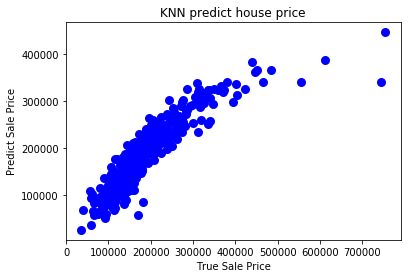

In [36]:
#plot
plt.scatter(y_test, y_test_pred, color='blue', linewidth=3)
plt.xlabel("True Sale Price")
plt.ylabel("Predict Sale Price")
plt.title("KNN predict house price")
plt.show()

In [ ]:
reg = linear_model.Ridge (alpha = .5)
#learning

In [38]:
#learning
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
615,616,85,80.0,8800,6,7,1963,1963,156.0,763,...,480,120,0,0,0,0,0,0,5,2010
613,614,20,70.0,8402,5,5,2007,2007,0.0,206,...,0,0,30,0,0,0,0,0,12,2007
1303,1304,20,73.0,8688,7,5,2005,2005,228.0,0,...,834,208,59,0,0,0,0,0,4,2006
486,487,20,79.0,10289,5,7,1965,1965,168.0,836,...,515,0,0,0,0,0,0,0,6,2007
561,562,20,77.0,10010,5,5,1974,1975,0.0,1071,...,418,240,38,0,0,0,0,0,4,2006


In [42]:
X_train_example = X_train[['MSSubClass']]

In [43]:
X_train_example.head()

,MSSubClass
615,85
613,20
1303,20
486,20
561,20


In [44]:
reg.fit(X_train_example, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
reg_example = linear_model.LinearRegression(normalize=False)
reg_example.fit(X_train_example, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
reg_example.coef_

array([-179.10725184])

In [52]:
reg.intercept_

191296.17520361536

In [54]:
reg.coef_

array([-179.10725184])

In [ ]:
X_test.head()

In [ ]:
#validation prediction MSE
y_test_pred = reg.predict(X_test)
mean_squared_error(y_test, y_test_pred)

In [ ]:
#train prediction MSE
y_train_pred = reg.predict(X_train)
mean_squared_error(y_train, y_train_pred)

In [33]:
test_numeric_pred = reg.predict(test_numeric) 
#use knn to predict test_numeric
#test_numeric['SalePrice'] = test_numeric_pred
#result = test_numeric[['Id','SalePrice']]
#result.to_csv('submission_knn_version_0.csv',index=False)

ValueError: shapes (1459,38) and (37,) not aligned: 38 (dim 1) != 37 (dim 0)

In [30]:
test_numeric['SalePrice'] = test_numeric_pred
result = test_numeric[['Id','SalePrice']]
result.to_csv('submission_linear_version_0.csv',index=False)